In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.colors import ListedColormap


In [11]:
#------------------------ Load and preprocess the data ------------------------
df = pd.read_csv('postgres_new_data.csv')

# Generate the column names as rv1, rv2, ..., rv1500
col_names = [f'rv{i}' for i in range(1, 1501)]

# Split the rv column by comma into a list of Series
split_series = df['rv'].str.split(',', n=1499, expand=True).apply(pd.Series)

# Concatenate the original DataFrame with the split Series
df = pd.concat([df, split_series], axis=1)

# Rename the split columns
df.rename(columns=dict(zip(split_series.columns, col_names)), inplace=True)

In [12]:
#column_names = df.columns.tolist()
# Columns to remove
#columns_to_remove = ['tm','knt','ae','ae_cl','rv']
#numeric_columns = list(set(column_names).difference(columns_to_remove))
#numeric_columns = list(filter(lambda col: col not in columns_to_remove, column_names))


numeric_columns = [f'rv{i}' for i in range(1, 1501)]

# Print the generated variable names
print(numeric_columns)


print(df[numeric_columns])

['rv1', 'rv2', 'rv3', 'rv4', 'rv5', 'rv6', 'rv7', 'rv8', 'rv9', 'rv10', 'rv11', 'rv12', 'rv13', 'rv14', 'rv15', 'rv16', 'rv17', 'rv18', 'rv19', 'rv20', 'rv21', 'rv22', 'rv23', 'rv24', 'rv25', 'rv26', 'rv27', 'rv28', 'rv29', 'rv30', 'rv31', 'rv32', 'rv33', 'rv34', 'rv35', 'rv36', 'rv37', 'rv38', 'rv39', 'rv40', 'rv41', 'rv42', 'rv43', 'rv44', 'rv45', 'rv46', 'rv47', 'rv48', 'rv49', 'rv50', 'rv51', 'rv52', 'rv53', 'rv54', 'rv55', 'rv56', 'rv57', 'rv58', 'rv59', 'rv60', 'rv61', 'rv62', 'rv63', 'rv64', 'rv65', 'rv66', 'rv67', 'rv68', 'rv69', 'rv70', 'rv71', 'rv72', 'rv73', 'rv74', 'rv75', 'rv76', 'rv77', 'rv78', 'rv79', 'rv80', 'rv81', 'rv82', 'rv83', 'rv84', 'rv85', 'rv86', 'rv87', 'rv88', 'rv89', 'rv90', 'rv91', 'rv92', 'rv93', 'rv94', 'rv95', 'rv96', 'rv97', 'rv98', 'rv99', 'rv100', 'rv101', 'rv102', 'rv103', 'rv104', 'rv105', 'rv106', 'rv107', 'rv108', 'rv109', 'rv110', 'rv111', 'rv112', 'rv113', 'rv114', 'rv115', 'rv116', 'rv117', 'rv118', 'rv119', 'rv120', 'rv121', 'rv122', 'rv123', 

In [13]:

model = LinearRegression()
def get_coeff(row, model=model):
    # Select only relevant columns
    row = row.loc[numeric_columns]
    # Drop NaN values
    row = row.dropna()
    if len(row) > 1:  # Check if there are enough data points for regression
        X = np.arange(len(row)).reshape(-1, 1)
        y = row.values.reshape(-1, 1)
        model.fit(X, y)
        slope = model.coef_[0][0]
        return slope
    else:
        return np.nan  # Return 

In [14]:
print(df[numeric_columns])

          rv1       rv2       rv3       rv4       rv5       rv6       rv7  \
0     26.0026   25.0025   26.0026   26.0026   26.0026   26.0026   26.0026   
1     25.0025   25.0025   25.0025   25.0025   25.0025   25.0025   25.0025   
2     25.0025   25.0025   25.0025   25.0025   25.0025   25.0025   25.0025   
3     28.0028   28.0028   28.0028   28.0028   28.0028   28.0028   28.0028   
4     27.0027   28.0028   28.0028   28.0028   27.0027   28.0028   28.0028   
...       ...       ...       ...       ...       ...       ...       ...   
5379  27.0027   26.0026   26.0026   27.0027   27.0027   27.0027   27.0027   
5380  27.0027   27.0027   27.0027   27.0027   27.0027   27.0027   27.0027   
5381  27.0027   27.0027   26.0026   27.0027   27.0027   27.0027   27.0027   
5382  27.0027   27.0027   27.0027   27.0027   27.0027   27.0027   27.0027   
5383  27.0027   27.0027   27.0027   27.0027   27.0027   27.0027   27.0027   

           rv8       rv9      rv10  ...    rv1491    rv1492    rv1493  \
0 

In [15]:

df['mn'] = df[numeric_columns].select_dtypes(include='number').mean(axis=1)
df['ds'] = df[numeric_columns].select_dtypes(include='number').std(axis=1)
df.head()


,tm,knt,ae,ae_cl,rv,rv1,rv2,rv3,rv4,rv5,...,rv1493,rv1494,rv1495,rv1496,rv1497,rv1498,rv1499,rv1500,mn,ds
0,2022-10-13 03:38:11.838465,1500,0.109208,0,"26.0026, 25.0025, 26.0026, 26.0026, 26.0026, 2...",26.0026,25.0025,26.0026,26.0026,26.0026,...,25.0025,26.0026,26.0026,26.0026,26.0026,25.0025,26.0026,26.0026,NaN,NaN
1,2022-10-13 13:30:49.852566,1500,0.317388,0,"25.0025, 25.0025, 25.0025, 25.0025, 25.0025, 2...",25.0025,25.0025,25.0025,25.0025,25.0025,...,24.0024,25.0025,25.0025,25.0025,25.0025,25.0025,25.0025,25.0025,NaN,NaN
2,2022-10-13 14:17:07.820202,1500,0.300354,0,"25.0025, 25.0025, 25.0025, 25.0025, 25.0025, 2...",25.0025,25.0025,25.0025,25.0025,25.0025,...,25.0025,25.0025,25.0025,25.0025,25.0025,25.0025,25.0025,25.0025,NaN,NaN
3,2022-09-07 23:13:37.665544,1500,0.179053,0,"28.0028, 28.0028, 28.0028, 28.0028, 28.0028, 2...",28.0028,28.0028,28.0028,28.0028,28.0028,...,28.0028,28.0028,28.0028,28.0028,28.0028,28.0028,28.0028,28.0028,NaN,NaN
4,2022-09-07 23:25:58.593231,1500,0.300354,0,"27.0027, 28.0028, 28.0028, 28.0028, 27.0027, 2...",27.0027,28.0028,28.0028,28.0028,27.0027,...,28.0028,28.0028,28.0028,28.0028,28.0028,28.0028,28.0028,28.0028,NaN,NaN


In [16]:

df["slope"] = df.apply(get_coeff, axis=1)
# Drop the original 'rv' column
df.drop('rv', axis=1, inplace=True)
df.head()

,tm,knt,ae,ae_cl,rv1,rv2,rv3,rv4,rv5,rv6,...,rv1494,rv1495,rv1496,rv1497,rv1498,rv1499,rv1500,mn,ds,slope
0,2022-10-13 03:38:11.838465,1500,0.109208,0,26.0026,25.0025,26.0026,26.0026,26.0026,26.0026,...,26.0026,26.0026,26.0026,26.0026,25.0025,26.0026,26.0026,NaN,NaN,-0.000023
1,2022-10-13 13:30:49.852566,1500,0.317388,0,25.0025,25.0025,25.0025,25.0025,25.0025,25.0025,...,25.0025,25.0025,25.0025,25.0025,25.0025,25.0025,25.0025,NaN,NaN,-0.000047
2,2022-10-13 14:17:07.820202,1500,0.300354,0,25.0025,25.0025,25.0025,25.0025,25.0025,25.0025,...,25.0025,25.0025,25.0025,25.0025,25.0025,25.0025,25.0025,NaN,NaN,-0.000024
3,2022-09-07 23:13:37.665544,1500,0.179053,0,28.0028,28.0028,28.0028,28.0028,28.0028,28.0028,...,28.0028,28.0028,28.0028,28.0028,28.0028,28.0028,28.0028,NaN,NaN,0.000035
4,2022-09-07 23:25:58.593231,1500,0.300354,0,27.0027,28.0028,28.0028,28.0028,27.0027,28.0028,...,28.0028,28.0028,28.0028,28.0028,28.0028,28.0028,28.0028,NaN,NaN,0.000014


In [133]:
#------------------------ Define the features and labels ------------------------



X = df.loc[:, 'rv1':'rv1500'].astype(float).values
X = df.loc[:, ['rv1', 'rv2', 'mn', 'ds']].astype(float).values

# X = df[col_names].astype(float).values
y = df['ae_cl']

# Create a mask that is True for non-nan values and False for nan values
mask = ~np.isnan(y)

# Apply the mask to both X and y
X = X[mask]
y = y[mask]

# Check the count of each class in y
print(np.unique(y, return_counts=True))

# Convert the data to tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.LongTensor(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


KeyError: 'rv1'

In [ ]:

# X = df[col_names].astype(float).values
y = df['ae_cl']

# Create a mask that is True for non-nan values and False for nan values
mask = ~np.isnan(y)

# Apply the mask to both X and y
X = X[mask]
y = y[mask]

# Check the count of each class in y
print(np.unique(y, return_counts=True))


In [112]:

# Convert the data to tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.LongTensor(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


In [119]:

# Apply the mask to both X and y
X = X[mask]
y = y[mask]

# Check the count of each class in y
print(np.unique(y, return_counts=True))

# Convert the data to tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.LongTensor(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.1, random_state=42)


(array([0, 1, 2], dtype=int64), array([ 116,  268, 5000], dtype=int64))


In [123]:
#------------------------ Define the neural network model ------------------------

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(1500, 512)  # Input layer with 1500 input features and 1500 hidden units
        self.fc2 = nn.Linear(512, 3)  # Hidden layer with 1500 units and 3 output units
        #self.softmax = nn.LogSoftmax.Softmax(dim=1)  # Softmax layer to get probabilities of each class
        self.softmax = nn.LogSoftmax(dim=1)  # Softmax layer to get probabilities of each class

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation to the hidden layer
        x = self.fc2(x)  # Apply linear transformation to the output layer
        x = self.softmax(x)  # Apply softmax to get probabilities of each class
        
        return x


# Create an instance of the neural network model
model = NeuralNetwork()

# Cast X_train and X_test to the same data type as model.fc1.weight
X_train = X_train.to(model.fc1.weight.dtype)
X_test = X_test.to(model.fc1.weight.dtype)

# Assigning more weight to minority classes
total = 116 + 268 + 5000 # Total number of samples
weight_0 = total / 116 # Weight for class 0
weight_1 = total / 268 # Weight for class 1
weight_2 = total / 5000 # Weight for class 2
weight = torch.tensor([weight_0, weight_1, weight_2]) # Tensor of class weights


# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=weight)
optimizer = optim.Adam(model.parameters(), lr=0.00001)


In [124]:

# Create an instance of the neural network model
model = NeuralNetwork()

# Cast X_train and X_test to the same data type as model.fc1.weight
X_train = X_train.to(model.fc1.weight.dtype)
X_test = X_test.to(model.fc1.weight.dtype)

# Assigning more weight to minority classes
total = 116 + 268 + 5000 # Total number of samples
weight_0 = (1-total/116) # Weight for class 0
weight_1 = (1-total/268) # Weight for class 1
weight_2 = (1-total/5000) # Weight for class 2
weight = torch.tensor([weight_2, weight_1, weight_0]) # Tensor of class weights


# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=weight)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [125]:
#------------------------ Train and evaluate the model ------------------------


# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")

# Evaluate the model
with torch.no_grad():
    train_outputs = model(X_train)
    train_predictions = torch.argmax(train_outputs, dim=1)
    train_accuracy = (train_predictions == y_train).float().mean()

    test_outputs = model(X_test)
    test_predictions = torch.argmax(test_outputs, dim=1)
    test_accuracy = (test_predictions == y_test).float().mean()


print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))



Epoch 1/100, Loss: 17.4747
Epoch 2/100, Loss: 1.7716
Epoch 3/100, Loss: 2.2630
Epoch 4/100, Loss: 2.3510
Epoch 5/100, Loss: 2.1964
Epoch 6/100, Loss: 1.8086
Epoch 7/100, Loss: 1.2183
Epoch 8/100, Loss: 0.4551
Epoch 9/100, Loss: 22.5478
Epoch 10/100, Loss: 1.0092
Epoch 11/100, Loss: 2.2920
Epoch 12/100, Loss: 3.4274
Epoch 13/100, Loss: 4.4289
Epoch 14/100, Loss: 5.3080
Epoch 15/100, Loss: 6.0748
Epoch 16/100, Loss: 6.7382
Epoch 17/100, Loss: 7.3063
Epoch 18/100, Loss: 7.7864
Epoch 19/100, Loss: 8.1852
Epoch 20/100, Loss: 8.5089
Epoch 21/100, Loss: 8.7633
Epoch 22/100, Loss: 8.9538
Epoch 23/100, Loss: 9.0855
Epoch 24/100, Loss: 9.1629
Epoch 25/100, Loss: 9.1905
Epoch 26/100, Loss: 9.1723
Epoch 27/100, Loss: 9.1123
Epoch 28/100, Loss: 9.0140
Epoch 29/100, Loss: 8.8808
Epoch 30/100, Loss: 8.7157
Epoch 31/100, Loss: 8.5218
Epoch 32/100, Loss: 8.3017
Epoch 33/100, Loss: 8.0579
Epoch 34/100, Loss: 7.7927
Epoch 35/100, Loss: 7.5084
Epoch 36/100, Loss: 7.2068
Epoch 37/100, Loss: 6.8899
Epoch 38

     Actual  Predicted
0         2          2
1         2          2
2         2          2
3         2          2
4         1          2
..      ...        ...
534       0          2
535       2          2
536       2          2
537       2          2
538       2          2

[539 rows x 2 columns]
Correct predictions: 496
Total predictions: 539
Accuracy: 0.92
Total predictions per class: (array([2], dtype=int64), array([539], dtype=int64))


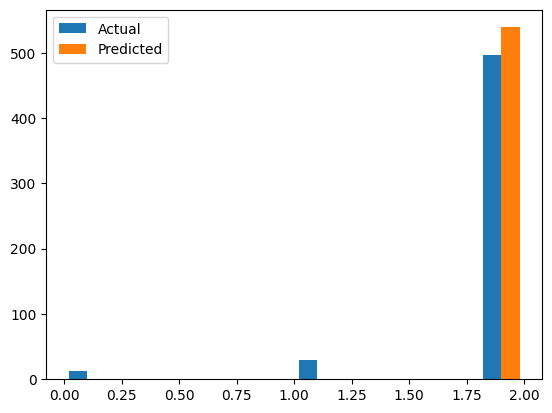

In [126]:
#------------------------ Analyze predictions ------------------------


# Create and print new df with actual and predicted value for test set
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': test_predictions.flatten()})
print(df)

# Save the dataframe to a CSV file
df.to_csv('predictions_cl.csv', index=False)


# Calculate difference between actual and predicted values
df['Difference'] = (df['Actual'] - df['Predicted'])

# Calculate accuracy
count = (df['Difference'] == 0.00).sum()
print("Correct predictions:", count)
print("Total predictions:", len(df))
print("Accuracy:", (count / len(df)).round(2))

# Check the count of each class in df['Predicted']
print("Total predictions per class:", np.unique(df['Predicted'], return_counts=True))

# NB the model ALWAYS predicts 2, given the high frequency of its occurence in the training set

# Plot actual and predicted values with histogram
plt.hist([df['Actual'], df['Predicted']], label=['Actual', 'Predicted'])
plt.legend()
plt.show()

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#------------------------ Create and train the model ------------------------

# Create and fit a random forest regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train.ravel()) # use ravel to flatten y_train

# Make predictions on the test set
y_pred = rfr.predict(X_test)


: 

In [ ]:
#------------------------ Analyze predictions ------------------------

# Evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Accuracy
accuracy = rfr.score(X_test, y_test)
print(f"Raw Accuracy: {accuracy:.2f}")

# Create new csv with actual and predicted data
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': np.round(y_pred, 0)})

# Add the difference column
df['Difference'] = df['Actual'] - df['Predicted']

# Calculate accuracy of the model after rounding to the nearest integer
accuracy = (df['Difference'] == 0.00).sum() / len(df)
print(f"Adjusted Accuracy: {accuracy:.2f}")

# Save the dataframe to a CSV file
df.to_csv('predictions_rf.csv', index=False)


: 

In [ ]:
#------------------------ Plot predictions ------------------------

# Plot actual and predicted values with histogram
plt.hist([df['Actual'], df['Predicted']], label=['Actual', 'Predicted'])
plt.legend()
plt.show()

: 

# Neural Network with replicated rows

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


#------------------------ Load and preprocess the data ------------------------


df = pd.read_csv('/content/drive/MyDrive/Sensors/postgres_new_data.csv')

# Generate the column names as rv1, rv2, ..., rv1500
col_names = [f'rv{i}' for i in range(1, 1501)]

# Split the rv column by comma into a list of Series
split_series = df['rv'].str.split(',', n=1499, expand=True).apply(pd.Series)

# Concatenate the original DataFrame with the split Series
df = pd.concat([df, split_series], axis=1)

# Rename the split columns
df.rename(columns=dict(zip(split_series.columns, col_names)), inplace=True)

# Drop the original 'rv' column
df.drop('rv', axis=1, inplace=True)

# Remove ALL Nan rows
df.dropna(axis=0, how='all', inplace=True)

# Replicate 4 times class 1 and 5 times class 0
df_replicated = pd.concat([df[df['ae_cl'] == 1]] * 4 + [df[df['ae_cl'] == 0]] * 5)

# Add the replicated rows to the original DataFrame
df = pd.concat([df, df_replicated])

print(df.shape)

# Check if there are any Nan rows
nan_rows = df[df.isnull().any(axis=1)]
if nan_rows.empty:
    print("There are no NaN rows")
else:
    print("There are NaN rows")

# Check ae_cl count
print(df['ae_cl'].value_counts())

: 

In [ ]:
#------------------------ Define the features and labels ------------------------



X = df.loc[:, 'rv1':'rv1500'].astype(float).values
# X = df[col_names].astype(float).values
y = df['ae_cl']

# Create a mask that is True for non-nan values and False for nan values
mask = ~np.isnan(y)

# Apply the mask to both X and y
X = X[mask]
y = y[mask]

# Check the count of each class in y
print(np.unique(y, return_counts=True))

# Convert the data to tensors
X_tensor = torch.from_numpy(X)
y_tensor = torch.LongTensor(np.squeeze(y.values).astype(int)) # use np.squeeze on the values attribute


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)


: 

In [ ]:
#------------------------ Define the neural network model ------------------------

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.conv1 = nn.Conv1d(1, 3, 3) # Convolutional layer with 1 input channel, 3 output channels, and filter size 3
        self.fc2 = nn.Linear(4494, 3) # Linear layer with 4494 input features and 3 output units

    def forward(self, x):
        x = x.view(x.size(0), 1, -1) # Reshape the input to have a channel dimension
        x = torch.relu(self.conv1(x)) # Apply ReLU activation to the convolutional layer
        x = x.view(x.size(0), -1) # Flatten the output to have a feature dimension
        x = self.fc2(x) # Apply linear transformation to the output layer
        return x # Return the logits without softmax


# Create an instance of the neural network model
model = NeuralNetwork()

# Cast X_train and X_test to the same data type as model.fc1.weight
X_train = X_train.to(model.conv1.weight.dtype)
X_test = X_test.to(model.conv1.weight.dtype)


# Assigning more weight to minority classes
total = 696 + 1340 + 5000 # Total number of samples
weight_0 = total / 696 # Weight for class 0
weight_1 = total / 1340 # Weight for class 1
weight_2 = total / 5000 # Weight for class 2
weight = torch.tensor([weight_0, weight_1, weight_2]) # Tensor of class weights

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss(weight=weight)
optimizer = optim.Adam(model.parameters(), lr=0.000001)


: 

In [ ]:
#------------------------ Train and evaluate the model ------------------------


# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}")


# Evaluate the model
with torch.no_grad():
    train_outputs = model(X_train)
    train_predictions = torch.argmax(train_outputs, dim=1)
    train_accuracy = (train_predictions == y_train).float().mean()

    test_outputs = model(X_test)
    test_predictions = torch.argmax(test_outputs, dim=1)
    test_accuracy = (test_predictions == y_test).float().mean()


print("Training Accuracy: {:.2f}%".format(train_accuracy * 100))
print("Testing Accuracy: {:.2f}%".format(test_accuracy * 100))



: 

In [ ]:
#------------------------ Analyze predictions ------------------------


# Create and print new df with actual and predicted value for test set
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': test_predictions.flatten()})
print(df)

# Save the dataframe to a CSV file
df.to_csv('predictions_cl.csv', index=False)


# Calculate difference between actual and predicted values
df['Difference'] = (df['Actual'] - df['Predicted'])

# Calculate accuracy
count = (df['Difference'] == 0.00).sum()
print("Correct predictions:", count)
print("Total predictions:", len(df))
print("Accuracy:", (count / len(df)).round(2))

# Check the count of each class in df['Predicted']
print("Total predictions per class:", np.unique(df['Predicted'], return_counts=True))

# NB the model ALWAYS predicts 2, given the high frequency of its occurence in the training set

# Plot actual and predicted values with histogram
plt.hist([df['Actual'], df['Predicted']], label=['Actual', 'Predicted'])
plt.legend()
plt.show()

: 

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

#------------------------ Create and train the model ------------------------

# Create and fit a random forest regressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train.ravel()) # use ravel to flatten y_train

# Make predictions on the test set
y_pred = rfr.predict(X_test)


: 

In [ ]:
#------------------------ Analyze predictions ------------------------

# Evaluate the model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Accuracy
accuracy = rfr.score(X_test, y_test)
print(f"Raw Accuracy: {accuracy:.2f}")

# Create new csv with actual and predicted data
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': np.round(y_pred, 0)})

# Add the difference column
df['Difference'] = df['Actual'] - df['Predicted']

# Calculate accuracy of the model after rounding to the nearest integer
accuracy = (df['Difference'] == 0.00).sum() / len(df)
print(f"Adjusted Accuracy: {accuracy:.2f}")

# Save the dataframe to a CSV file
df.to_csv('predictions_rf.csv', index=False)


: 

In [ ]:
#------------------------ Plot predictions ------------------------

# Plot actual and predicted values with histogram
plt.hist([df['Actual'], df['Predicted']], label=['Actual', 'Predicted'])
plt.legend()
plt.show()

: 

In [ ]:
#------------------------ Predict single  ------------------------


# Convert the row into a numpy array and reshape it to have the same shape as X_train
#row = np.array(row).reshape(1, 1500)

# Predict the class of the row using the model
#cl = int(rfr.predict(row))

# Print the result
#print(f"The predicted class of the row is {cl}")


: 

In [ ]:
!python --version

: 

In [73]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a sample DataFrame
data = {'c1': [1, 2, 3, 4, 5],
        'c2': [2, 4, 6, 8, 10],
        'c3': [3, 6, 9, 12, 15],
        'c4': [4, 8, 12, 16, 20],
        'c5': [5, 10, 15, 20, 25],
        }

df = pd.DataFrame(data)

# Specify the columns to include in the linear regression (exclude 'c1' and 'c2')
columns_to_include = ['c3', 'c4', 'c5']

# Create an instance of LinearRegression
model = LinearRegression()

# Function to get coefficient for each row
def get_coeff(row, model=model):
    # Select only relevant columns
    row = row.loc[columns_to_include]
    
    # Drop NaN values
    row = row.dropna()
    
    if len(row) > 1:  # Check if there are enough data points for regression
        X = np.arange(len(row)).reshape(-1, 1)
        y = row.values.reshape(-1, 1)
        model.fit(X, y)
        slope = model.coef_[0][0]
        return slope
    else:
        return np.nan  # Return NaN if there are not enough data points

# Apply the function to each row to get only the slope values
df['slope'] = df.apply(get_coeff, axis=1)

print(df[['slope']])


   slope
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
